# Pandas Examples

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from utils import parsing
import nltk


## Configuration

### Variables

In [21]:
save_files = True

### Loading data

In [22]:
filename = './data/star_wars_dialogue.pkl'
df = pd.read_pickle(filename)

print(f'Shape: {df.shape}')

df.head()

Shape: (4986, 3)


,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
2,THREEPIO,We're doomed!,A New Hope
3,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
4,THREEPIO,What's that?,A New Hope
5,THREEPIO,I should have known better than to trust the l...,A New Hope


## Matplotlib and Seaborn

### Horizontal Barplot top 20

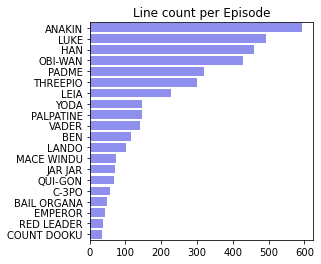

In [23]:
character_series = df['character'].value_counts()[:20,]
plt.figure(figsize=(4, 4))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='blue', alpha=0.5)

ax.set_title(f'Line count per Episode')
plt.show()

### Horizontal Barplots with values

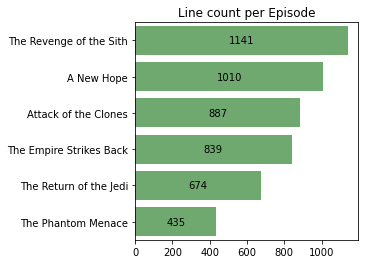

In [24]:
character_series = df['episode'].value_counts()
plt.figure(figsize=(4, 4))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='green',
                 alpha=0.6)
for p in ax.patches:
    annotation_value =format(p.get_width(), '.0f')
    x_pos = (p.get_x() + p.get_width())/2.
    y_pos =  p.get_y() + p.get_height()/2.
    ax.annotate(annotation_value, 
                (x_pos, y_pos), ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')
ax.set_title(f'Line count per Episode')
plt.show()

### Save figure to file

In [25]:
if save_files:
    fig = ax.get_figure()
    png_filename = './output/bar_plot_episdoes.png'
    fig.savefig(png_filename)
    print(f'{png_filename}')

./output/bar_plot_episdoes.png


### Histograms

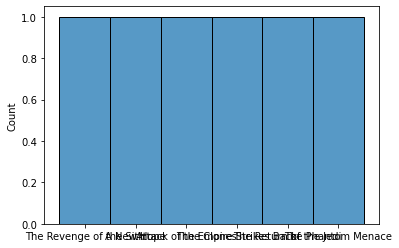

In [26]:
ax = sns.histplot( x=character_series.index)
plt.show()

## Dataframe

### List columns

In [27]:
columns = list(df.columns)
print(columns)

['character', 'dialogue', 'episode']


### Change Column Order

In [28]:
df = df.reindex(columns=['episode', 'character', 'dialogue', ])

df.head()

,episode,character,dialogue
1,A New Hope,THREEPIO,Did you hear that? They've shut down the main...
2,A New Hope,THREEPIO,We're doomed!
3,A New Hope,THREEPIO,There'll be no escape for the Princess this time.
4,A New Hope,THREEPIO,What's that?
5,A New Hope,THREEPIO,I should have known better than to trust the l...


### Using df.apply()

In [29]:
def simple_word_count(text):
    word_list = text.split(' ')
    return len(word_list)

df['word_count'] = df['dialogue'].apply(simple_word_count)

df.head()

,episode,character,dialogue,word_count
1,A New Hope,THREEPIO,Did you hear that? They've shut down the main...,21
2,A New Hope,THREEPIO,We're doomed!,2
3,A New Hope,THREEPIO,There'll be no escape for the Princess this time.,9
4,A New Hope,THREEPIO,What's that?,2
5,A New Hope,THREEPIO,I should have known better than to trust the l...,16


In [38]:
def check_for_the_force(text):
    return 'the force' in text.lower()

df['invoque_the_force'] = df['dialogue'].apply(check_for_the_force)

df.head()

,episode,character,dialogue,word_count,is_jedi,invoque_the_force
1,A New Hope,THREEPIO,Did you hear that? They've shut down the main...,21,False,False
2,A New Hope,THREEPIO,We're doomed!,2,False,False
3,A New Hope,THREEPIO,There'll be no escape for the Princess this time.,9,False,False
4,A New Hope,THREEPIO,What's that?,2,False,False
5,A New Hope,THREEPIO,I should have known better than to trust the l...,16,False,False


In [39]:
df['invoque_the_force'].value_counts()

False    4863
True       89
Name: invoque_the_force, dtype: int64

### Histogram

In [30]:
df['word_count'].describe()

count    4986.000000
mean       10.949458
std        10.534266
min         1.000000
25%         4.000000
50%         8.000000
75%        14.000000
max       135.000000
Name: word_count, dtype: float64

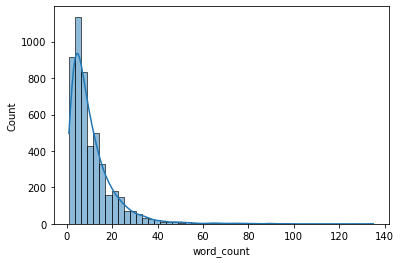

In [31]:
ax = sns.histplot(data=df, x="word_count", bins=50, kde=True)

### Replace data


In [32]:
character_series

The Revenge of the Sith    1141
A New Hope                 1010
Attack of the Clones        887
The Empire Strikes Back     839
The Return of the Jedi      674
The Phantom Menace          435
Name: episode, dtype: int64

In [33]:
condition = df['character'] == 'C-3PO'
df.loc[condition, 'character'] = 'THREEPIO'

df['character'].value_counts()[:20,]

ANAKIN         594
LUKE           494
HAN            459
OBI-WAN        427
THREEPIO       358
PADME          318
LEIA           227
YODA           147
PALPATINE      145
VADER          140
BEN            115
LANDO          101
MACE WINDU      74
JAR JAR         70
QUI-GON         69
BAIL ORGANA     47
EMPEROR         44
RED LEADER      38
COUNT DOOKU     35
BIGGS           34
Name: character, dtype: int64

### Replace Data and create new columns

In [34]:
condition = (df['character'] == 'LUKE') | (df['character'] == 'OBI-WAN') |\
            (df['character'] == 'YODA') | (df['character'] == 'MACE WINDU') | \
            (df['character'] == 'QUI-GON')


df['is_jedi'] = False
df.loc[condition, 'is_jedi'] = True

df['is_jedi'].value_counts()[:20,]

False    3775
True     1211
Name: is_jedi, dtype: int64

### Drop rows with NaN in Column

In [35]:
df['is_biggs'] = 0

condition = df['character'] == 'BIGGS'
df.loc[condition, 'is_biggs'] = float('NaN')
print(f'Shape before drop: {df.shape}')

df.dropna(subset = ["is_biggs"], inplace=True)

print(f'Shape after drop: {df.shape}')

Shape before drop: (4986, 6)
Shape after drop: (4952, 6)


### Drop a Column

In [37]:
df.drop(columns=['is_biggs',], inplace=True)
print(f'Shape after drop: {df.shape}')

Shape after drop: (4952, 5)


## Jupyter Notebooks

### HTML Formatting

Very goog article https://skelouse.github.io/styling_a_jupyter_notebook

In [17]:
from IPython.core.display import HTML
html_warning = """<div class="alert alert-info">
  <strong>Let's start with THIS blue box:</strong>
</div>
"""
HTML(html_warning)

In [18]:
html_warning = """<div class="alert alert-danger">
  <strong>Let's start with THIS blue box:</strong>
</div>
"""
HTML(html_warning)